In [126]:
# Data Manipulation
import pandas as pd
# Calculations and Numerical Operations
import numpy as np
# Data Visualization
import plotly
import seaborn as sns
# Geographic Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from IPython.display import display
import gmaps
from IPython.display import IFrame
from geopy.geocoders import Nominatim

In [114]:
df = pd.read_csv('NYPD.csv')
df.columns

Index(['Unnamed: 0', 'DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [115]:
# Set edge borders for the heatmap and cluster visualization
west, south, east, north = -84.03, 30.63, -63.77, 50.85
df = df[(df.LATITUDE> south) & (df.LATITUDE < north)]
df = df[(df.LONGITUDE> west) & (df.LONGITUDE < east)]
df.rename(columns={'LATITUDE':'lat', 'LONGITUDE':'lon'}, inplace=True)

In [60]:
hm = folium.Map(location=[40.731950, -73.890480],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")
heat_map = HeatMap(list(zip(df['lat'], df['lon'])), min_opacity=0.2, radius=9, blur=15, max_zoom=1)
hm.add_child(heat_map)
hm.save('heatmap.html')
IFrame(src='./heatmap.html', width=1100, height=900)

In [62]:
cluster = folium.Map(location=[40.731950, -73.890480],
                        zoom_start=12,
                        tiles="CartoDB dark_matter")
mc = MarkerCluster()
for ind,row in mf.iterrows():
    mc.add_child(folium.CircleMarker(location=[row['lat'],row['lon']],
                        radius=1,color='#3185cc'))
cluster.add_child(mc)
cluster.save('cluster.html')
IFrame(src='./cluster.html', width=1100, height=900)

In [35]:
df['BOROUGH'].value_counts()

BROOKLYN         31634
QUEENS           27250
MANHATTAN        24451
BRONX            14057
STATEN ISLAND     4554
Name: BOROUGH, dtype: int64

In [36]:
df.isna().sum()

Unnamed: 0                            0
DATE                                  0
TIME                                  0
BOROUGH                           29202
ZIP CODE                          29219
LATITUDE                              0
LONGITUDE                             0
LOCATION                              0
ON STREET NAME                    23735
CROSS STREET NAME                 42089
OFF STREET NAME                  113344
NUMBER OF PERSONS INJURED             1
NUMBER OF PERSONS KILLED              1
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       317
CONTRIBUTING FACTOR VEHICLE 2     17731
CONTRIBUTING FACTOR VEHICLE 3    122788
CONTRIBUTING FACTOR VEHICLE 4    129382
CONTRIBUTING FACTOR VEHICLE 5    130713
UNIQUE KEY                            0


In [64]:
df['location'] = df['lat'].astype(str) + ', ' + df['lon'].astype(str)
df['location'].head()

0            40.816662, -73.9389911
1               40.59713, -73.95221
4           40.8423355, -73.9161838
5    40.631707500000005, -73.946481
7           40.7171751, -74.0128675
Name: location, dtype: object

In [73]:
frequency = df['location'].value_counts()
frequency.head(10)

40.608757000000004, -74.03808599999999    66
40.8047, -73.91243                        55
40.658577799999996, -73.89062290000001    50
40.696034600000004, -73.9845292           49
40.696033, -73.98453                      46
40.7606005, -73.9643142                   46
40.798256, -73.82744                      45
40.604153000000004, -74.05198             44
40.7572323, -73.9897922                   43
40.861862, -73.91282                      43
Name: location, dtype: int64

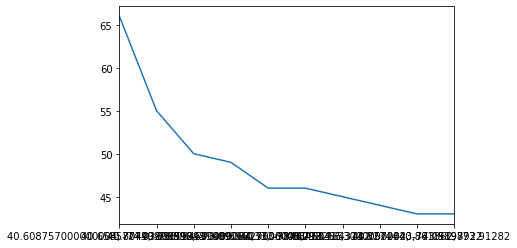

In [74]:
frequency.nlargest(10).plot()

In [70]:
geolocator = Nominatim()
for c in frequency.nlargest(10).index:
    location = geolocator.reverse(c)
    print(location.address + "\n")

C:\Users\Steven\AnacondaNew\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



Verrazzano-Narrows Bridge (Staten Island Bound), Fort Hamilton, BK, Kings County, NYC, New York, 11252, USA

East 138th Street, Port Morris, The Bronx, Bronx County, NYC, New York, 10454, USA

Pennsylvania Avenue, East New York, BK, Kings County, NYC, New York, 11239, USA

Flatbush Avenue Extension, Downtown Brooklyn, BK, Kings County, NYC, New York, 11201-1832, USA

Flatbush Avenue Extension, Downtown Brooklyn, BK, Kings County, NYC, New York, 11201-1832, USA

The Landmark, 300, East 59th Street, Midtown East, Manhattan Community Board 8, Manhattan, New York County, NYC, New York, 10022, USA

Bronx-Whitestone Bridge, Whitestone Bridge (Toll), The Bronx, Queens County, NYC, New York, 11357, USA

Verrazzano-Narrows Bridge, Fort Hamilton, BK, Kings County, NYC, New York, 11252, USA

11 Times Square, 11, 8th Avenue, Times Square, Theater District, Manhattan Community Board 5, Manhattan, New York County, NYC, New York, 10036, USA

Major Deegan Expressway, University Heights, The Bronx, Bro

In [140]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
df['Month'] = df['DATE'].dt.month

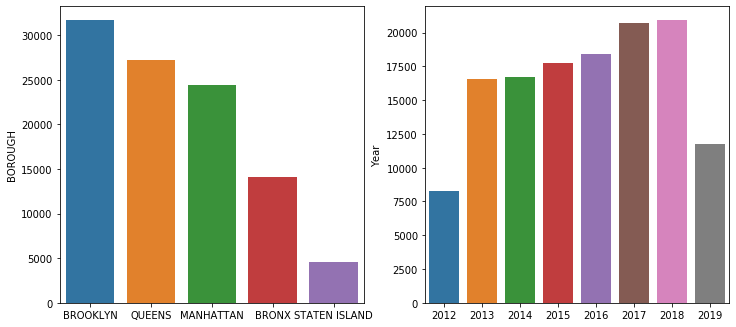

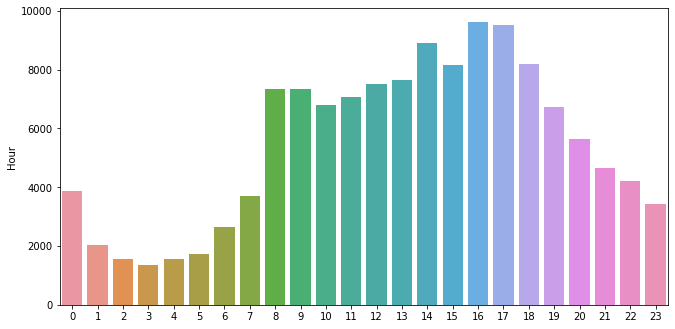

In [148]:
boroughs = pd.DataFrame(df['BOROUGH'].value_counts())
plt.figure(figsize = (12,12))
plt.subplot2grid((2,2),(0,0))
sns.barplot(x = boroughs.index, y = 'BOROUGH', data = boroughs)
years = pd.DataFrame(df['Year'].value_counts())
plt.subplot2grid((2,2),(0,1))
sns.barplot(x = years.index, y = 'Year', data = years)
df['Hour'] = df['TIME'].dt.hour 
hours = pd.DataFrame(df['Hour'].value_counts())
plt.figure(figsize = (24,12))
plt.subplot2grid((2,2),(0,0))
sns.barplot(x = hours.index, y = 'Hour', data = hours)